<a href="https://colab.research.google.com/github/davidzimniok/MPA-MLF/blob/main/MINIPROJECT01/projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

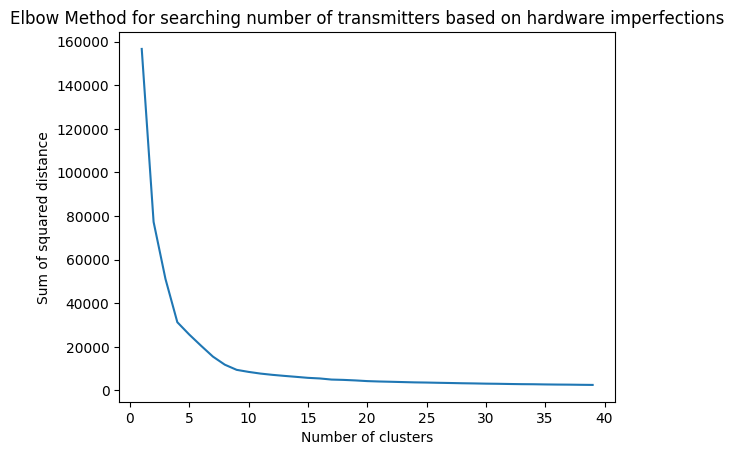

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

max_range=40
#connect to the google drive
from google.colab import drive
drive.mount('/content/drive')

#load dataset from folder at drive
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/projekt01/Data_prepared_final.csv")

#delete features as time and number of row - data starts at 3rd column
data=data.iloc[:,2:]

#apply scaling to the dataset
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)


pca = PCA(n_components=3)
pca.fit(scaled_data)
Xpca = pca.transform(scaled_data)
scaled_data=Xpca

#array for calculated sum of squres of distances of each point to centroid that is attached to
all_objective=[]

#calculate K-means for 1 to max_range clusters and calculate
for i in range(1,max_range):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(scaled_data)
    all_objective.append(kmeans.inertia_)

#plot elbow
plt.plot(range(1,max_range),all_objective)
plt.title('Elbow Method for searching number of transmitters based on hardware imperfections')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distance')
plt.show()
